<a href="https://colab.research.google.com/github/maarjunk/House-Prices-Regression/blob/mehrdad/HousePrice2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.pipeline import make_pipeline
from seaborn import heatmap

In [3]:
df1 = pd.read_csv('train.csv')
df1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
x = df1.drop(['SalePrice'],axis=1)
y = df1['SalePrice'].copy()

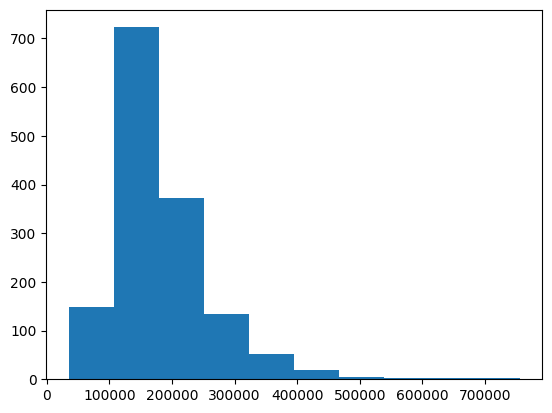

In [5]:
plt.hist(y)
plt.show()

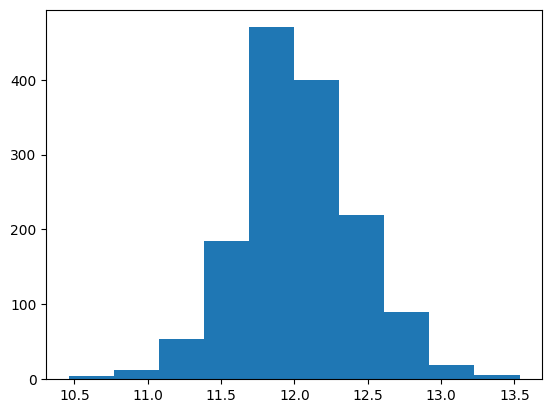

In [6]:
y = np.log1p(y)
plt.hist(y)
plt.show()

In [7]:
 def mypipe(x):
  from sklearn.compose import ColumnTransformer
  from sklearn.preprocessing import OneHotEncoder , StandardScaler
  from sklearn.impute import SimpleImputer

  cat_columns = x.select_dtypes(include=['object']).columns
  num_columns = x.select_dtypes(include=['number']).columns


  cat_teransformer = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder(handle_unknown='ignore'))
  num_transformer = make_pipeline(SimpleImputer(strategy='median'),StandardScaler())

  return ColumnTransformer(transformers=[('num',num_transformer,num_columns),('cat',cat_teransformer,cat_columns)])

In [11]:
def evaluate(model , x , y):

  from sklearn.model_selection import cross_val_score

  model.fit(x,y)

  rmse1 = cross_val_score(model , x , y , scoring='neg_mean_squared_error' , cv = 5)
  mse = np.sqrt(-1*(rmse1.mean()))

  r2_ = cross_val_score(model , x , y , scoring='r2' , cv = 5)
  r2 = r2_.mean()

  print(f'r2 : {r2}\nRMSE :{mse}')

  return mse , r2

In [9]:
def testing(model , x , y , func=None):

  Xcopy = x.copy()
  Ycopy = y.copy()

  if func:

    Xcopy = func(Xcopy)

  pipe = make_pipeline(mypipe(Xcopy) , model)

  pipe.fit(Xcopy , Ycopy)
  evaluate(pipe , Xcopy , Ycopy)


In [12]:
from sklearn.linear_model import LinearRegression

testing(LinearRegression(),x,y)

r2 : 0.840858526286293
RMSE :0.15952250832764933


In [13]:
def drop_most_null(x_):
  x_ = x_.drop(['PoolQC','MiscFeature','Alley','Fence'],axis=1)
  return x_

In [14]:
testing(LinearRegression(),x,y,drop_most_null)

r2 : 0.8438536761087114
RMSE :0.15810333492435016


<ipython-input-16-528cb67913aa>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap(df1.corr()[['SalePrice']],annot = True)


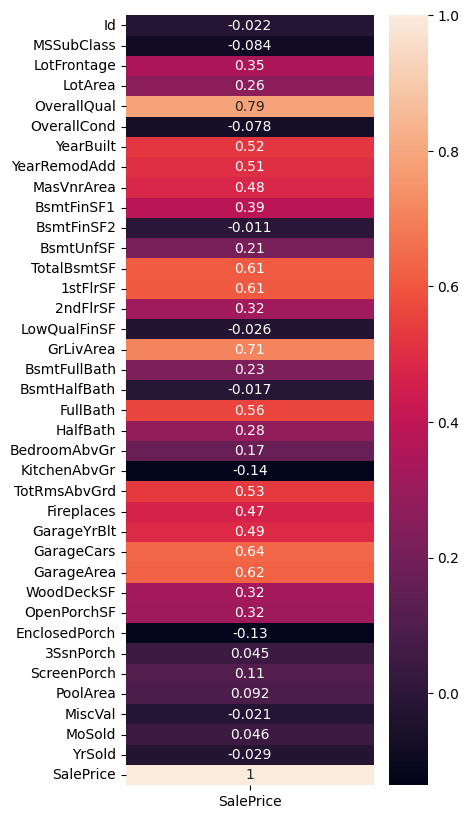

In [16]:
plt.figure(figsize=(4,10))
heatmap(df1.corr()[['SalePrice']],annot = True)
plt.show()

In [24]:
def bad_corr(x):

  x = x.drop(['MSSubClass','LowQualFinSF','BsmtHalfBath','KitchenAbvGr','EnclosedPorch','MiscVal','YrSold','Id'],axis=1)

  return x

In [25]:
testing(LinearRegression(),x,y,bad_corr)

r2 : 0.8429281832243187
RMSE :0.15836176410216762


In [26]:
def bad_columns(x):

  x = x.drop(['MSSubClass','LowQualFinSF','BsmtHalfBath','KitchenAbvGr','EnclosedPorch','MiscVal','YrSold','Id','PoolQC','MiscFeature','Alley','Fence'],axis=1)

  return x

In [27]:
testing(LinearRegression(),x,y,bad_columns)

r2 : 0.8461104216638906
RMSE :0.15675756108019714


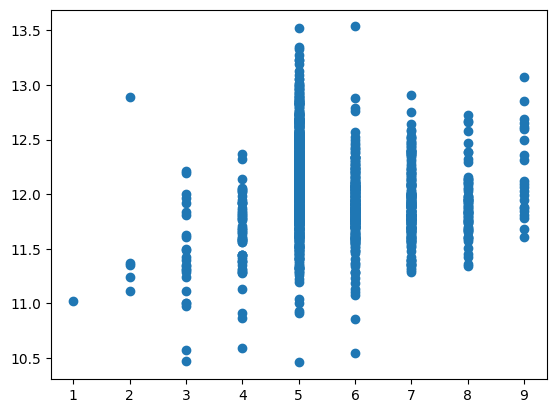

In [29]:
plt.scatter(x.OverallCond , y)
plt.show()

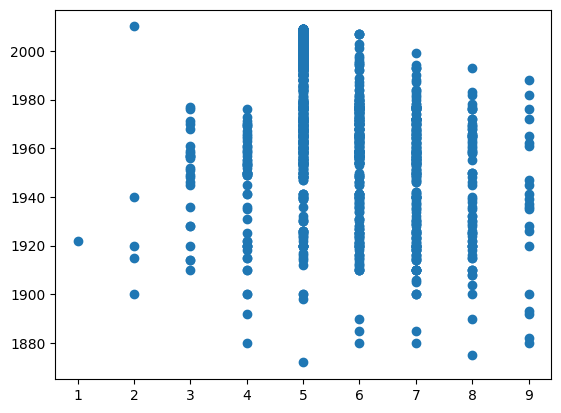

In [30]:
plt.scatter(x.OverallCond , x.YearBuilt)
plt.show()

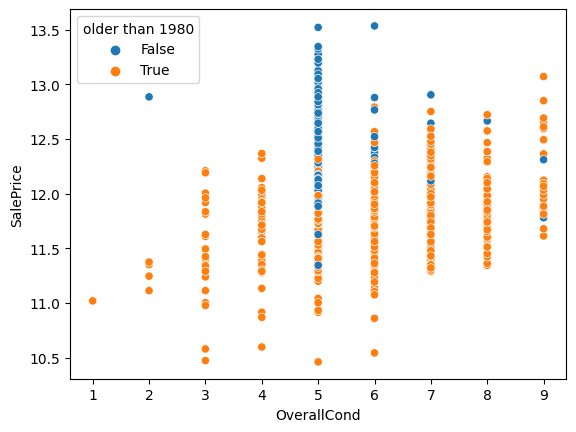

In [46]:
older_houses = x['YearBuilt']<1980
plot = sns.scatterplot(x = x.OverallCond , y = y , hue = older_houses)
plot.legend_.set_title('older than 1980')
plt.show()

In [59]:
def age(x):

  x['HouseAge'] = 2020 - x.YearBuilt

  return x

In [60]:
testing(LinearRegression() , x , y ,age)

r2 : 0.840858479411243
RMSE :0.15952247243133463
